# K-Means Clustering Algorithm

<img src="figure/kmeans.jpg" alt="hulatocat" width="600" height="350"/>

*This work is based on great Tiep'blog (https://machinelearningcoban.com/2017/01/01/kmeans/)*

INPUT
    + X: Data
    + K: Number of the cluster
OUTPUT
    + M: Centers
    + Y: Label vector for each data point
PROCESS
    1. Choose first centers K randomly.
    2. Partition each data point into the cluster with the closest center: For each vector i=1,...,N, assign Xi to the group associated with the nearest distance.
    3. If the data assignment to each cluster in step 2 does not change from the previous loop, we stop the algorithm.
    4. Update the center for each cluster by taking the average of all data points assigned to that cluster after step 2.
    5. Go back to step 2.

**IMPLEMENT in Python**

In [1]:
# import requirement packages
import numpy as np # for compute matrix and vector
import matplotlib.pyplot as plt # for plot
from scipy.spatial.distance import cdist # for compute distance between point pairs in two sets
np.random.seed(11)

We create the data by taking the normal distribution points at the points with coordinates (2, 2), (8, 3) and (3, 6), the same covariance matrix and also is unit matrix. Each cluster has 500 points.

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

#data_1 = np.random.randn(500, 2) + means[0]
#data_2 = np.random.randn(500, 2) + means[1]
#data_3 = np.random.randn(500, 2) + means[2]

Build `kmeans_display` funtion to plot data. Then display the data according to the original label.

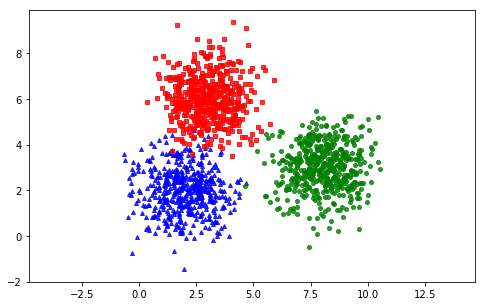

In [3]:
def kmeans_display(X, label, plot_centers=False, centers=0):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.figure(figsize=(8,5))
    if plot_centers:
        plt.scatter(centers[0,0], centers[0,1], marker='^', c='y', s=150)
        plt.scatter(centers[1,0], centers[1,1], marker='o', c='y', s=150)
        plt.scatter(centers[2,0], centers[2,1], marker='s', c='y', s=150)
        
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha=.8)
        
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

**Functions for K-means clustering**
1. `kmeans_init_centers` to initialize the original centers.
2. `kmeans_assign_labels` to assign new label to data points when you knows centers.
3. `kmeans_update_centers` to update new centers on newly labeled data.
4. `has_converged` to check the stop condition of the algorithm.

In [4]:
def kmeans_init_centers(X, K):
    # Randomly pick K rows of X as initial centers
    return X[np.random.choice(X.shape[0], K, replace=False)]

def kmeans_assign_labels(X, centers):
    # Calculate pairwise distance btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all point assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

The main function of k-means clustering:

In [5]:
def kmeansclust(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[ 2.99084705  6.04196062]
 [ 1.97563391  2.01568065]
 [ 8.03643517  3.02468432]]


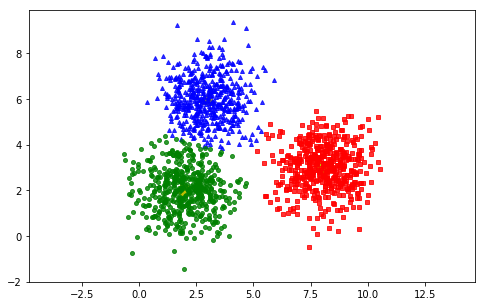

In [6]:
(centers, labels, it) = kmeansclust(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1], plot_centers=True, centers=centers[-1])

**Use scikit-learn library**

Centers found by scikit-learn:
[[ 8.0410628   3.02094748]
 [ 2.99357611  6.03605255]
 [ 1.97634981  2.01123694]]


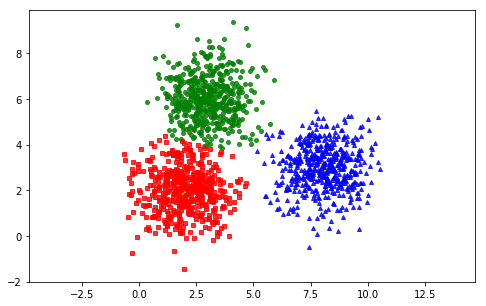

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label, plot_centers=True, centers=kmeans.cluster_centers_)

## Test on Iris Dataset

In [8]:
import pandas as pd
# Load the dataset
df = pd.read_csv("./input/Iris.csv")
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
# Replace "Id" column
df.drop('Id', axis=1, inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]

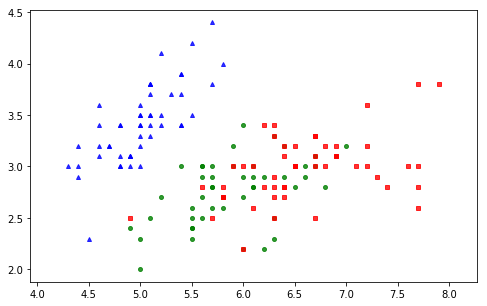

In [11]:
kmeans_display(data, category)

Centers found by our algorithm:
[[ 5.006       3.418       1.464       0.244     ]
 [ 5.88360656  2.74098361  4.38852459  1.43442623]
 [ 6.85384615  3.07692308  5.71538462  2.05384615]]


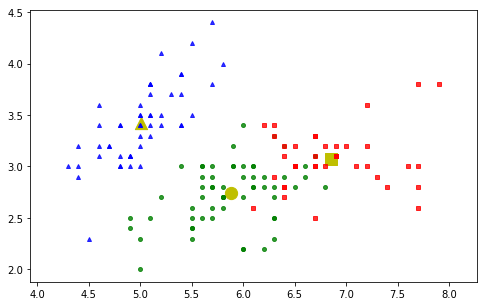

In [12]:
K = 3
(centers, labels, it) = kmeansclust(data, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(data, labels[-1], plot_centers=True, centers=centers[-1])

**Use scikit-learn library**

Centers found by scikit-learn:
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


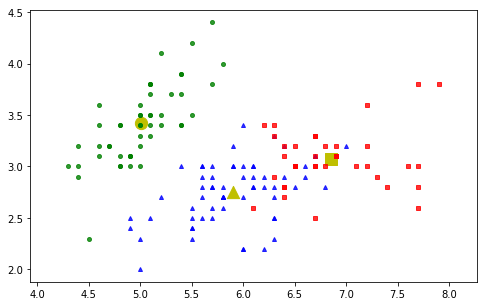

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(data)
kmeans_display(data, pred_label, plot_centers=True, centers=kmeans.cluster_centers_)